In [2]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [9]:
import pandas as pd
df = pd.read_csv(path_data+'TrainingData.csv', index_col=0)
df.head()

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
198,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplemental *,...,Non-Certificated Salaries And Wages,NaN,NaN,Care and Upkeep of Building Services,NaN,NaN,-8291.86,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I CARRYOVER
209,Student Transportation,NO_LABEL,Shared Services,Non-School,NO_LABEL,NO_LABEL,Other Non-Compensation,NO_LABEL,PreK-12 Operating,REPAIR AND MAINTENANCE SERVICES,...,NaN,ADMIN. SERVICES,NaN,STUDENT TRANSPORT SERVICE,NaN,NaN,618.29,PUPIL TRANSPORTATION,General Fund,NaN
750,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,Personal Services - Teachers,...,NaN,NaN,1.0,NaN,NaN,TEACHER,49768.82,Instruction - Regular,General Purpose School,NaN
931,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,General Supplies,...,General Supplies,NaN,NaN,Instruction,Instruction And Curriculum,NaN,-1.02,"""Title I, Part A Schoolwide Activities Related...",General Operating Fund,NaN
1524,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,Supplies and Materials,...,Supplies And Materials,NaN,NaN,Other Community Services *,NaN,NaN,2304.43,NaN,Title I - Disadvantaged Children/Targeted Assi...,TITLE I PI+HOMELESS


              FTE         Total
count  449.000000  1.542000e+03
mean     0.493532  1.446867e+04
std      0.452844  7.916752e+04
min     -0.002369 -1.044084e+06
25%      0.004310  1.108111e+02
50%      0.440000  7.060299e+02
75%      1.000000  5.347760e+03
max      1.047222  1.367500e+06


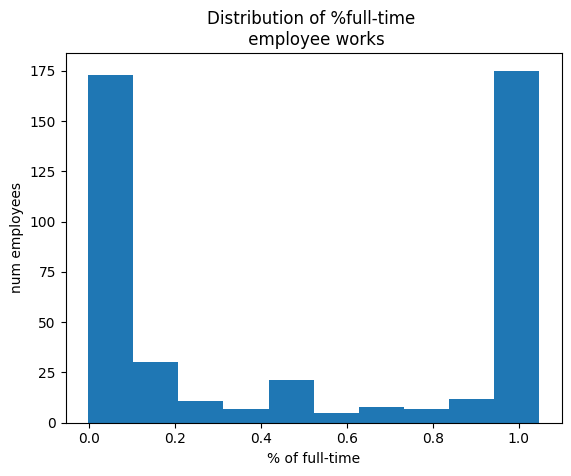

'\nNice! The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.\n'

In [10]:
# exercise 01

"""
Summarizing the data

You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called df.

You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

    FTE: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
    Total: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset.

This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, download the Scikit-Learn Cheat Sheet and keep it handy!
(https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116)
"""

# Instructions

"""

    Print summary statistics of the numeric columns in the DataFrame df using the .describe() method.
    Import matplotlib.pyplot as plt.
    Create a histogram of the non-null 'FTE' column. You can do this by passing df['FTE'].dropna() to plt.hist().
    The title has been specified and axes have been labeled, so hit submit to see how often school employees work full-time!

"""

# solution

# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna())

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

#----------------------------------#

# Conclusion

"""
Nice! The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.
"""

In [12]:
# exercise 02

"""
Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

The data has been loaded into the workspace as df. Your job is to look at the DataFrame attribute .dtypes in the IPython Shell, and call its .value_counts() method in order to answer the question below.

Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?
"""

# Instructions

"""

"""

# solution

display(df.dtypes.value_counts())

#----------------------------------#

# Conclusion

"""
Yes! That's a lot of (slow) object types. Let's do some type conversion!
"""

object     23
float64     2
Name: count, dtype: int64

"\nYes! That's a lot of (slow) object types. Let's do some type conversion!\n"

In [13]:
# exercise 03

"""
Encode the labels as categorical variables

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take. The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

You will notice that every label is encoded as an object datatype. Because category datatypes are much more efficient your task is to convert the labels to category types using the .astype() method.

Note: .astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the .apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.
"""

# Instructions

"""

    Define the lambda function categorize_label to convert column x into x.astype('category').
    Use the LABELS list provided to convert the subset of data df[LABELS] to categorical types using the .apply() method and categorize_label. Don't forget axis=0.
    Print the converted .dtypes attribute of df[LABELS].

"""
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']
# solution

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis = 0)

# Print the converted dtypes
print(df[LABELS].dtypes)

#----------------------------------#

# Conclusion

"""
Great work! You're getting close to something you can work with. Keep it up!
"""

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


"\nGreat work! You're getting close to something you can work with. Keep it up!\n"

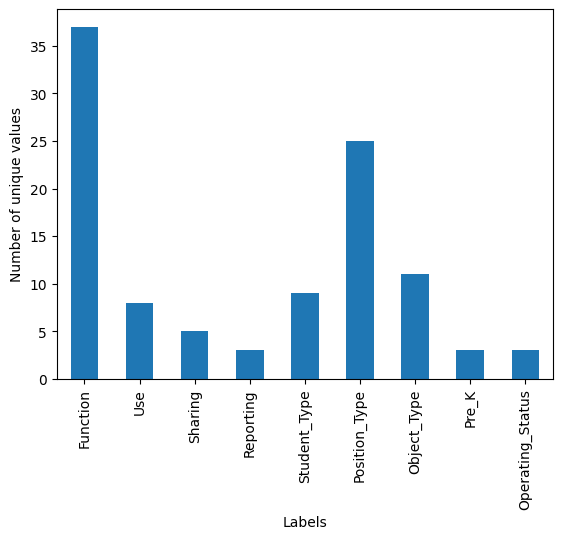

"\nWoah! That's a lot of labels to work with. How will you measure success with these many labels? You'll find out in the next video!\n"

In [14]:
# exercise 04

"""
Counting unique labels

As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

The dataframe df and the LABELS list have been loaded into the workspace; the LABELS columns of df have been converted to category types.

pandas, which has been pre-imported as pd, provides a pd.Series.nunique method for counting the number of unique values in a Series.
"""

# Instructions

"""

    Create the DataFrame num_unique_labels by using the .apply() method on df[LABELS] with pd.Series.nunique as the argument.
    Create a bar plot of num_unique_labels using pandas' .plot(kind='bar') method.
    The axes have been labeled for you, so hit submit to see the number of unique values for each label.

"""

# solution

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

#----------------------------------#

# Conclusion

"""
Woah! That's a lot of labels to work with. How will you measure success with these many labels? You'll find out in the next video!
"""

In [4]:
# exercise 05

"""
Penalizing highly confident wrong answers

As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.

Suppose you have the following 3 examples:

A: y = 1, p = 0.85
B: y = 0, p = 0.99
C: y = 0, p = 0.51

Select the ordering of the examples which corresponds to the lowest to highest log loss scores. y is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!
"""

# Instructions

"""
Lowest: A, Middle: B, Highest: C.


Lowest: C, Middle: A, Highest: B.


Lowest: A, Middle: C, Highest: B. (Answer)


Lowest: B, Middle: A, Highest: C
"""

# solution



#----------------------------------#

# Conclusion

"""
Yes! Of the two incorrect predictions, B will have a higher log loss because it is confident and wrong.
"""

'\n\n'

In [15]:
import numpy as np
def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
    actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
    predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
    + (1 - actual)
    * np.log(1 - predicted))
    return loss

In [17]:
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

In [18]:
# exercise 06

"""
Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss(), which Peter showed you in the video.

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.
"""

# Instructions

"""
Using the compute_log_loss() function, compute the log loss for the following predicted values (in each case, the actual values are contained in actual_labels):

    correct_confident.
    correct_not_confident.
    wrong_not_confident.
    wrong_confident.
    actual_labels.
"""

# solution

# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


#----------------------------------#

# Conclusion

"""
Wow! Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. You rock!
"""

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


'\nWow! Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models. You rock!\n'